In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import data

###### Test dataset

In [0]:
test_df = pd.read_csv('/content/drive/My Drive/Berlin/ReDI/P2 - Data Analytics with Python/Berlin/WS 2019/Titanic_study/titanic_dataset/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### Train dataset

In [0]:
train_df = pd.read_csv('/content/drive/My Drive/Berlin/ReDI/P2 - Data Analytics with Python/Berlin/WS 2019/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Gender submission

In [0]:
gender_df = pd.read_csv('/content/drive/My Drive/Berlin/ReDI/P2 - Data Analytics with Python/Berlin/WS 2019/Titanic_study/titanic_dataset/gender_submission.csv')
gender_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## I. Analyse Data

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 1. Visualize missing values


Missingno provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows you to get a quick visual summary of the completeness (or lack thereof) of your dataset. 

https://github.com/ResidentMario/missingno

In [0]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
import missingno as msno

<Figure size 1080x720 with 0 Axes>

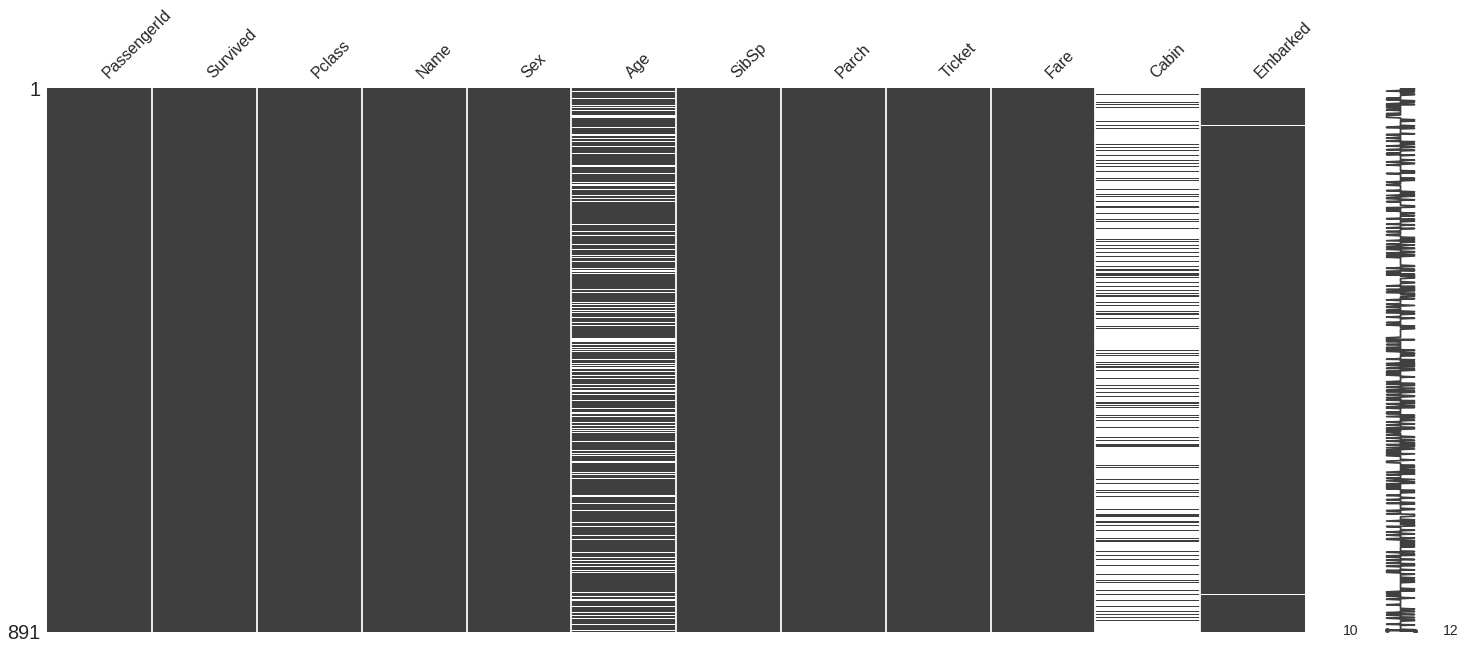

In [0]:
%matplotlib inline
;msno.matrix(train_df)

> The package missingno enables you to plot missing values from your dataset in a visual way and enables you to detect correlations between values missing in some columns or in others.
- The matrix functions enables you to see where the data is missing
- The bar function gives you an aggregate of missing values

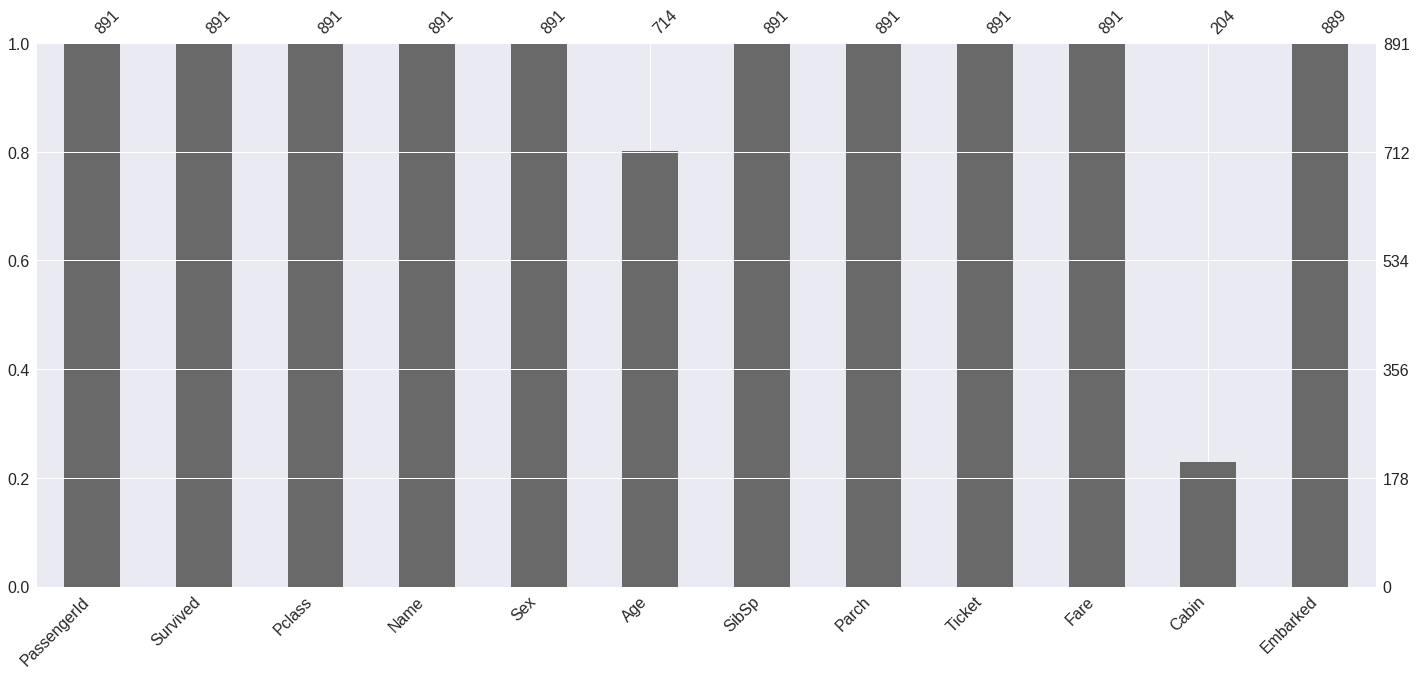

In [0]:
msno.bar(train_df)

We can see that we have data about the cabin for only about `22% of the passengers of the ship`

The dendrogram function allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

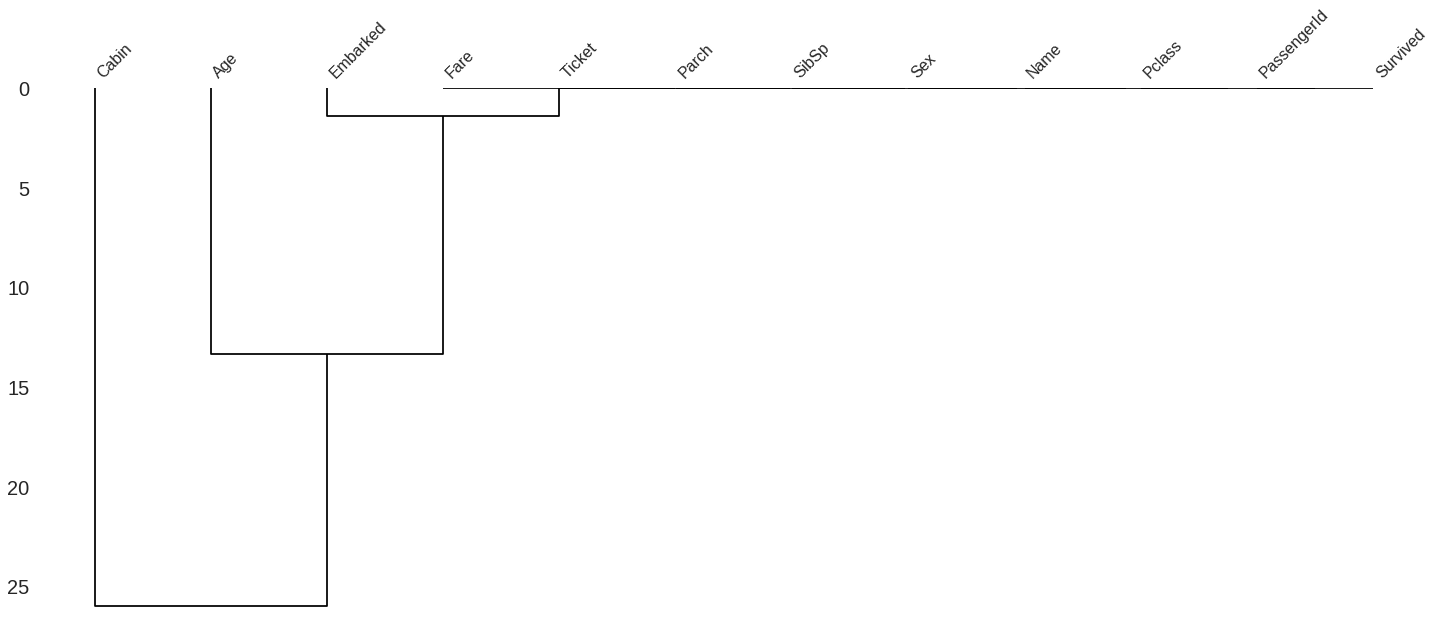

In [0]:
msno.dendrogram(train_df)

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

## 2. Handle Missing values

Link to correlated article >> https://machinelearningmastery.com/handle-missing-data-python/

Real-world data often has missing values.

Data can have missing values for a number of reasons such as observations that were not recorded and data corruption.

Handling missing data is important as many machine learning algorithms do not support data with missing values.

To handle missing values you can either:


1.   **Remove the rows with missing values** from your dataframe

2.   **Replace the missing values** with a number that can be a constant or an attribute of the distribution such as:

      - Ignore the tuple is the simplest and not effective method.

      - Fill the missing value manually.

      - Use a global constant to fill the missing value.

      - Use attribute mean value to fill missing value.

      - Use attribute mean for all samples belonging to the same class as the given tuple.

      - Use most probable value to fill in the missing value (this may be determined with regression, inference tool, or decision tree induction)

### 1. Remove the rows with missing values

In [0]:
age = train_df.dropna().reset_index()

> - **`dropna`** is quite convenient when you decide that you are not interested in the rows containing missing values. 
> - To tackle missing value you can also use the function **`fillna`** that enables you to fill the missing value with the mean or median value of the distribution for example.

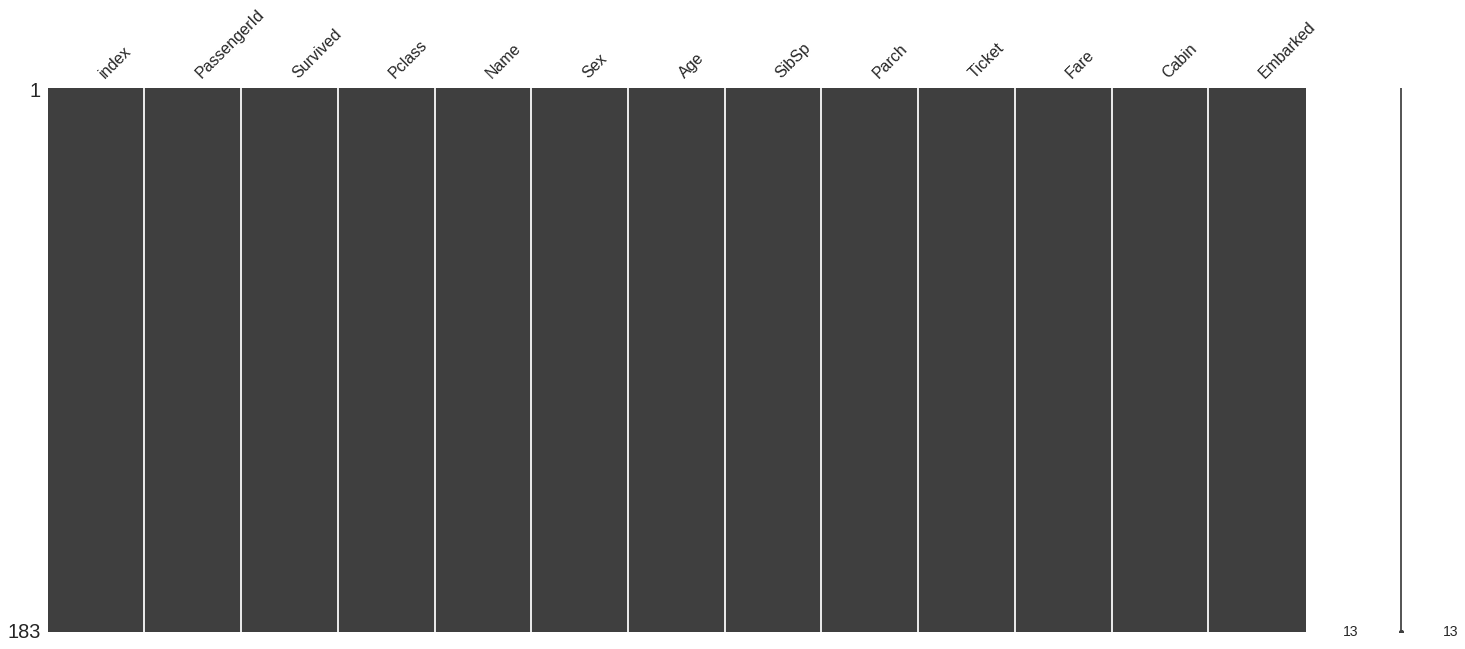

In [0]:
msno.matrix(age)

As you can see from this matrix, the data does not contain any missing value anymore

In [0]:
age_fillna = train_df.Age.fillna(train_df.Age.mean())

In [0]:
test_1 = train_df.fillna(train_df.mean())

The function will fill all the missing values with the corresponding mean of the column but only if it is a numerical type.
You can see below that the `Age` column was filled but not the `Cabin`
 column

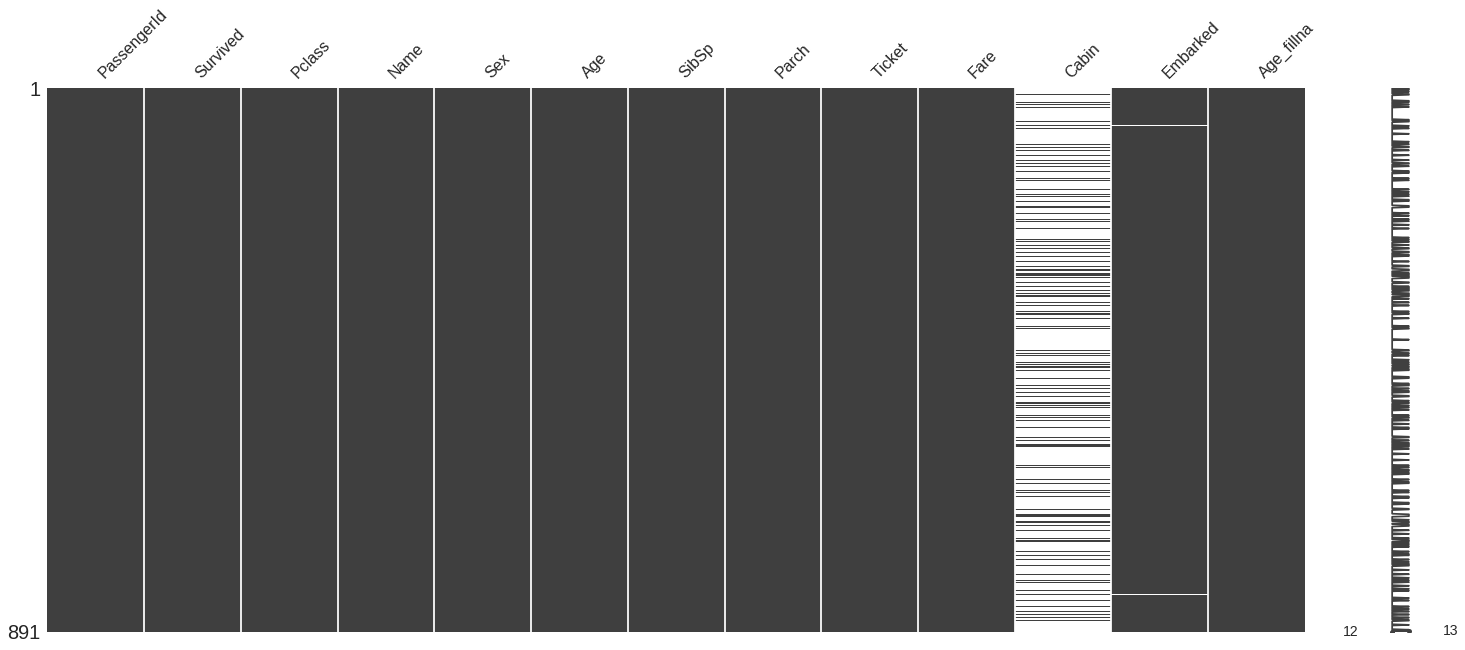

In [0]:
msno.matrix(test_1)

In [0]:
train_df['Age_fillna'] = age_fillna

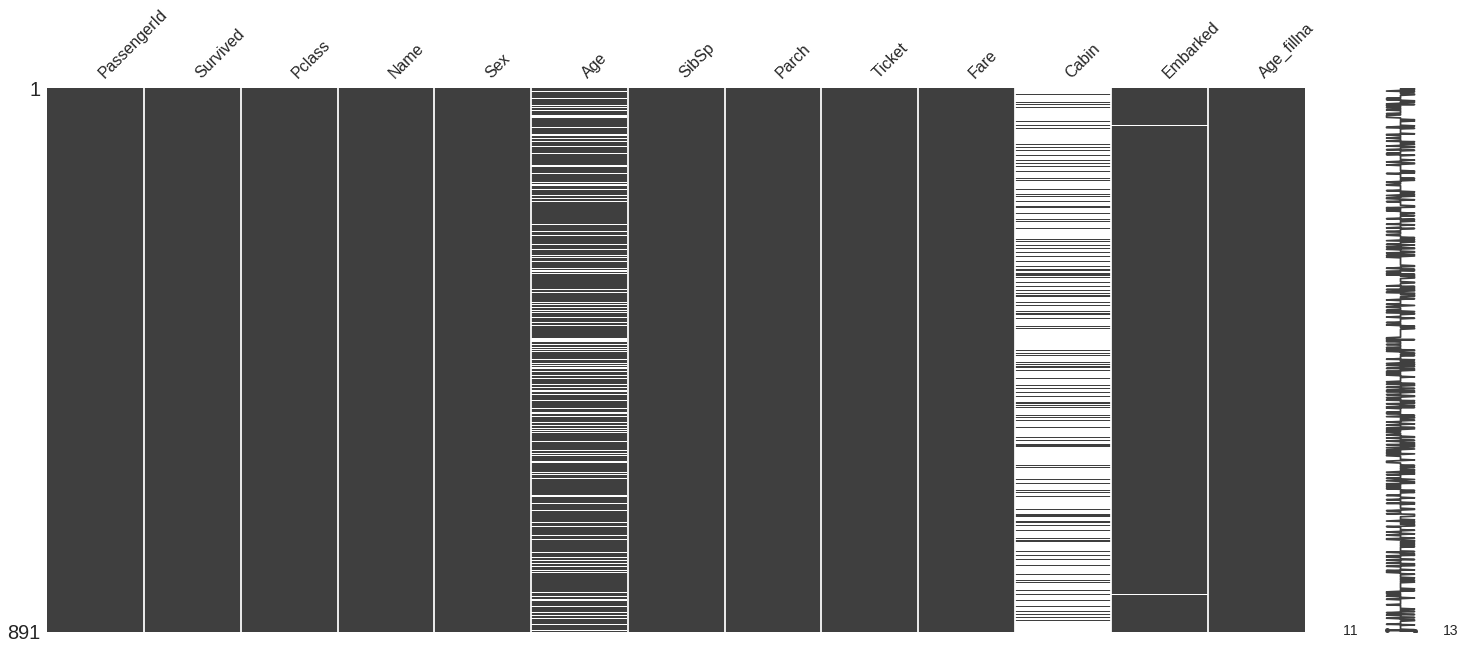

In [0]:
msno.matrix(train_df)

For the Cabin data it is not as easy as the column does not contain numbers but object. Let's have a closer look at the data contained in this column.

In [0]:
train_df.Cabin.describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

### Mean VS Median

- `Definition of Mean`: 
The mean of a distribution is the sum of all values of that distribution divided by the number of values present in that distribution. Mean <> Average.
- `Definition of Median`:
The median of a distribution is the value of the distribution that has as many sample of the distribution below it and above it.

#### Mean

In [0]:
mean_age_male = np.round(age[age.Sex == 'male'].Age.mean(),1)
mean_age_female = np.round(age[age.Sex == 'female'].Age.mean(),1)

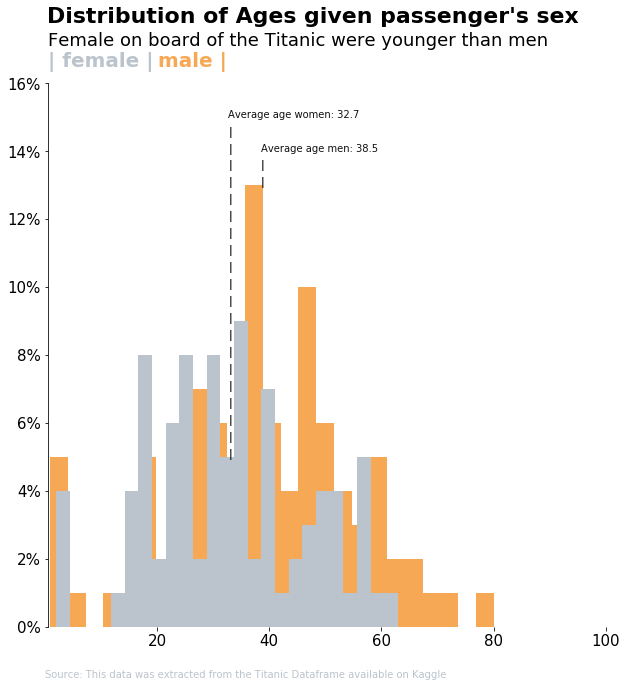

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
colors = ['#F7A854','#BBC4CC']
plt.hist(age[(age.Sex == 'male')].Age, bins = 25, color=colors[0])
plt.hist(age[(age.Sex == 'female')].Age, bins = 25, color=colors[1])

plt.xlim(0.5,100)
#plt.xticks(index[1:4], bucket_name[1:4])
plt.yticks(np.arange(0,18,2),['{}%'.format(i) for i in np.arange(0,18,2)])
plt.ylabel
#plt.title("Week 1 buckets: Listening context", fontsize=20)
plt.tick_params(labelsize=15)
ax.grid(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Distribution of Ages given passenger's sex", x = 0.475, y=1.1, fontsize=22, fontweight="bold")
plt.text(x = 0.5, y = 17.1, s = 'Female on board of the Titanic were younger than men', fontsize=18, )
plt.text(x = 0.5, y = 16.5, s = '| female |', fontsize=20, color = '#BBC4CC', fontweight="bold" )
plt.text(x = 19, y = 16.5, s = ' male |', fontsize=20, color = '#F7A854', fontweight="bold")
plt.text(x = 0, y = -1.5, s = 'Source: This data was extracted from the Titanic Dataframe available on Kaggle ', fontsize=10, color = '#BBC4CC')


# Annotation of the graph
plt.text(x = mean_age_male, y = 14, s = 'Average age men: {} '.format(mean_age_male), fontsize=10, color = '#111111')
for i in np.arange(13,14,0.5):
    plt.text(x = mean_age_male, y = i, s = '|'.format(mean_age_male), fontsize=10, color = '#111111', fontweight="bold")
plt.text(x = mean_age_female, y = 15, s = 'Average age women: {} '.format(mean_age_female), fontsize=10, color = '#111111')
for i in np.arange(5,15,0.5):
    plt.text(x = mean_age_female, y = i, s = '|'.format(mean_age_female), fontsize=10, color = '#111111', fontweight="bold")


# Show graphic
plt.show()

> -  You're duty as a Data Scientist when you are doing analytics is to make sense of the complicated data that you have access to and to translate it in an easily understandable way for your non technical audience.
> - Here, adding subtitle with what we can take out of this graph and annotations on the data makes the understanding of the graph almost direct. It saves your audience a lot of brain struggle and it enables you to tell the story YOU decided to tell. 

#### Median Age

In [0]:
median_age_male = np.round(age[age.Sex == 'male'].Age.median(),1)
median_age_female = np.round(age[age.Sex == 'female'].Age.median(),1)

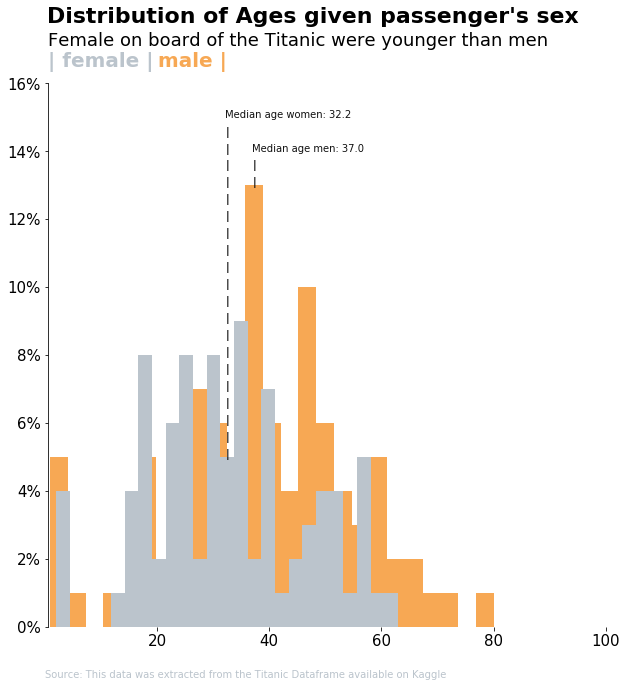

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
colors = ['#F7A854','#BBC4CC']
plt.hist(age[(age.Sex == 'male')].Age, bins = 25, color=colors[0])
plt.hist(age[(age.Sex == 'female')].Age, bins = 25, color=colors[1])

plt.xlim(0.5,100)
#plt.xticks(index[1:4], bucket_name[1:4])
plt.yticks(np.arange(0,18,2),['{}%'.format(i) for i in np.arange(0,18,2)])
plt.ylabel
#plt.title("Week 1 buckets: Listening context", fontsize=20)
plt.tick_params(labelsize=15)
ax.grid(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Distribution of Ages given passenger's sex", x = 0.475, y=1.1, fontsize=22, fontweight="bold")
plt.text(x = 0.5, y = 17.1, s = 'Female on board of the Titanic were younger than men', fontsize=18, )
plt.text(x = 0.5, y = 16.5, s = '| female |', fontsize=20, color = '#BBC4CC', fontweight="bold" )
plt.text(x = 19, y = 16.5, s = ' male |', fontsize=20, color = '#F7A854', fontweight="bold")
plt.text(x = 0, y = -1.5, s = 'Source: This data was extracted from the Titanic Dataframe available on Kaggle ', fontsize=10, color = '#BBC4CC')


# Annotation of the graph
plt.text(x = median_age_male, y = 14, s = 'Median age men: {} '.format(median_age_male), fontsize=10, color = '#111111')
for i in np.arange(13,14,0.5):
    plt.text(x = median_age_male, y = i, s = '|'.format(mean_age_male), fontsize=10, color = '#111111', fontweight="bold")
plt.text(x = median_age_female, y = 15, s = 'Median age women: {} '.format(median_age_female), fontsize=10, color = '#111111')
for i in np.arange(5,15,0.5):
    plt.text(x = median_age_female, y = i, s = '|'.format(median_age_female), fontsize=10, color = '#111111', fontweight="bold")


# Show graphic
plt.show()

### What were the percentage of people who survived given the following age buckets?


> - [0-17]
> - [18-24]
> - [25-34]
> - [35-44]
> - [45-54]
> - [55-64]
> - [65+]

#### 1. Let's create an age bucket feature

###### First we need to create an empty list that will take all the corresponding values of the age bucket for each passenger

In [0]:
age_bucket = []
for i in range(len(age.Age)): # We want the list to be as long as the number of passenger
    if age.Age[i] <= 17:
        age_bucket.append('0-17')
    if (age.Age[i] > 17) & (age.Age[i] <= 24):
        age_bucket.append('18-24')
    if (age.Age[i] > 24) & (age.Age[i] <= 34):
        age_bucket.append('25-34')
    if (age.Age[i] > 34) & (age.Age[i] <= 44):
        age_bucket.append('35-44')
    if (age.Age[i] > 44) & (age.Age[i] <= 54):
        age_bucket.append('45-54')        
    if (age.Age[i] > 54) & (age.Age[i] <= 64):
        age_bucket.append('55-64')
    if (age.Age[i] > 64):
        age_bucket.append('65+')
        
age['age_bucket'] = age_bucket

###### Let's look at a sample of the data to see if what we did was correct

In [0]:
age[['age_bucket','Age']].head(5)

,age_bucket,Age
0,35-44,38.0
1,35-44,35.0
2,45-54,54.0
3,0-17,4.0
4,55-64,58.0


> Looks good from here we can continue

#### 2. Now let's create a feature that represents the amount of passenger that survived given their `age_bucket`

In [0]:
df_survived = age.groupby('age_bucket').mean()['Survived']
df_survived = df_survived.reset_index()
df_survived['label'] = 'survived'
df_survived.columns = ['age_bucket','percentage','label']

In [0]:
df_died = pd.DataFrame([df_survived['age_bucket'],1 - df_survived['percentage']]).transpose()
df_died['label'] = 'died'
df_died['age_bucket'] = df_survived['age_bucket']
df_died.columns = ['age_bucket','percentage','label']

In [0]:
df = pd.concat([df_survived,df_died])
df.percentage = df.percentage*100

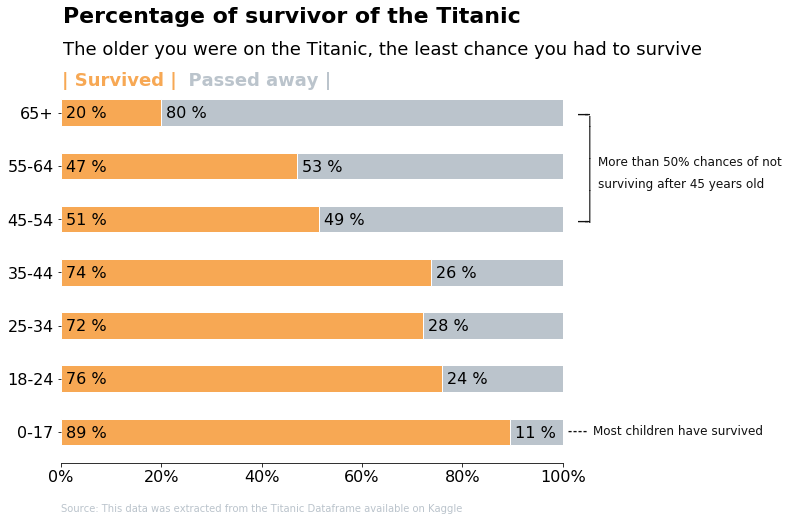

In [0]:
contexts = ['survived','died']
barWidth = 0.5
bucket_name = df_died.age_bucket.unique()
index = np.arange(7)
fig, ax = plt.subplots(figsize=(9,7))
list_below = np.zeros(7)
color_index = 0
colors = ['#F7A854','#BBC4CC']
for context in contexts:
    # Create green Bars
    plt.barh(index, df[df.label == context]['percentage'], left=list_below, height = barWidth, color=colors[color_index], edgecolor='white')
    list_below = [a+b for a,b in zip(list_below,list(df[df.label == context]['percentage']))]
    color_index = color_index + 1

# Custom x axis
plt.xlim(0.5,3.5)
ax.set_yticks(index)
ax.set_yticklabels(bucket_name)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(np.arange(0,120,20),['{}%'.format(i) for i in np.arange(0,120,20)])
plt.title("Percentage of survivor of the Titanic", x = 0.46, y=1.14, fontsize=22, fontweight="bold")
plt.text(x = 0.5, y = 7.1, s = 'The older you were on the Titanic, the least chance you had to survive', fontsize=18, )
plt.text(x = 0.30, y = 6.5, s = '| Survived |', fontsize=18, color = '#F7A854', fontweight="bold" )
plt.text(x = 23, y = 6.5, s = '  Passed away |', fontsize=18, color = '#BBC4CC', fontweight="bold")
plt.text(x = 0, y = -1.5, s = 'Source: This data was extracted from the Titanic Dataframe available on Kaggle ', fontsize=10, color = '#BBC4CC')
plt.tick_params(labelsize=16)


# annotations about old passengers
plt.text(x = 103, y = 6, s = '_', fontsize=10, color = '#111111', fontweight="bold")
plt.text(x = 104, y = 6, s = '_', fontsize=10, color = '#111111', fontweight="bold")
plt.text(x = 104.5, y = 6, s = '_', fontsize=10, color = '#111111', fontweight="bold")

for i in np.arange(4,6,0.2):
    plt.text(x = 105, y = i, s = '|', fontsize=10, color = '#111111', fontweight="bold")
plt.text(x = 107, y = 5, s = 'More than 50% chances of not', fontsize=12, color = '#111111')
plt.text(x = 107, y = 4.6, s = 'surviving after 45 years old ', fontsize=12, color = '#111111')


plt.text(x = 103, y = 4, s = '_', fontsize=10, color = '#111111', fontweight="bold")
plt.text(x = 104, y = 4, s = '_', fontsize=10, color = '#111111', fontweight="bold")
plt.text(x = 104.5, y = 4, s = '_', fontsize=10, color = '#111111', fontweight="bold")

# annotations about babies 

for i in np.arange(101,105,1):
    plt.text(x = i, y = -0.05, s = '-', fontsize=10, color = '#111111', fontweight="bold")
    
plt.text(x = 106, y = -0.05, s = 'Most children have survived', fontsize=12, color = '#111111')


# Show graphic

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if width >= 1:
        ax.annotate('{:.0f} %'.format(width), (p.get_x()+1, p.get_y()+.3*height), fontsize=16)

plt.show()


> We have seen previously `Histograms`, now here is an opportunity that I took to show you a different kind of graph which are called `Stacked barplots`

### Did the women survive more than the men?

In [0]:
df_survived = train_df.groupby('Sex').mean()['Survived']
df_survived = df_survived.reset_index()
df_survived['label'] = 'survived'
df_survived.columns = ['Sex','percentage','label']

In [0]:
df_died = pd.DataFrame([df_survived['Sex'],1 - df_survived['percentage']]).transpose()
df_died['label'] = 'died'
df_died['Sex'] = df_survived['Sex']
df_died.columns = ['Sex','percentage','label']

In [0]:
df = pd.concat([df_survived,df_died])
df.percentage = df.percentage*100

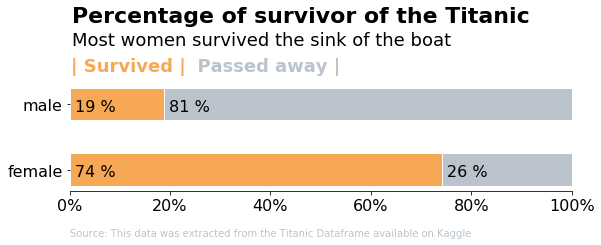

In [0]:
contexts = ['survived','died']
barWidth = 0.5
bucket_name = df_died.Sex.unique()
index = np.arange(2)
fig, ax = plt.subplots(figsize=(9,2))
list_below = np.zeros(2)
color_index = 0
colors = ['#F7A854','#BBC4CC']
for context in contexts:
    # Create green Bars
    plt.barh(index, df[df.label == context]['percentage'], left=list_below, height = barWidth, color=colors[color_index], edgecolor='white')
    list_below = [a+b for a,b in zip(list_below,list(df[df.label == context]['percentage']))]
    color_index = color_index + 1

# Custom x axis
plt.xlim(0.5,3.5)
ax.set_yticks(index)
ax.set_yticklabels(bucket_name)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(np.arange(0,120,20),['{}%'.format(i) for i in np.arange(0,120,20)])
plt.title("Percentage of survivor of the Titanic", x = 0.46, y=1.5, fontsize=22, fontweight="bold")
plt.text(x = 0.5, y = 1.9, s = 'Most women survived the sink of the boat', fontsize=18, )
plt.text(x = 0.30, y = 1.5, s = '| Survived |', fontsize=18, color = '#F7A854', fontweight="bold" )
plt.text(x = 23, y = 1.5, s = '  Passed away |', fontsize=18, color = '#BBC4CC', fontweight="bold")
plt.text(x = 0, y = -1, s = 'Source: This data was extracted from the Titanic Dataframe available on Kaggle ', fontsize=10, color = '#BBC4CC')
plt.tick_params(labelsize=16)



# Show graphic

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if width >= 1:
        ax.annotate('{:.0f} %'.format(width), (p.get_x()+1, p.get_y()+.3*height), fontsize=16)

plt.show()
